In [ ]:
# First: pip install wheel

# Next: Download Numpy and Scipy form Gholke's repo Numpy and SciPy


# Then:

# pip install numpy_package.whl
# pip install scipy_package.whl
# https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

In [1]:
# Importing modules
import random
import os
from pathlib import Path
from pprint import pprint
import logging
from importlib import reload  # Not needed in Python 2
import tqdm

import numpy as np
import scipy
import pandas as pd
import pickle

import nltk
import spacy
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.models.callbacks import PerplexityMetric, ConvergenceMetric, CoherenceMetric
from top2vec import Top2Vec


reload(logging)
logging.basicConfig(filename='model_callbacks.log',format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')
# logging.basicConfig(filename='gensim.log',
#                     format="%(asctime)s:%(levelname)s:%(message)s",
#                     level=logging.NOTSET)

In [2]:
DATA_DIR = Path('./data')
def load(filename):
    f = open(DATA_DIR/filename,"rb")
    return pickle.load(f)
    
def save(data, filename):
    with open(DATA_DIR/filename, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:

file = open("moties_processed_df.pickle","rb")
df = pickle.load(file)
print('before removal empty texts',len(df))

# remove moties without text
mask = (df['Text']=='') | (df['Text'].isna())
df = df.loc[~mask]
print('after removal empty texts',len(df))

before removal empty texts 29514
after removal empty texts 29484


In [66]:
documents = df['Text'].values
documents

array(['2\nTweede Kamer der Staten-Generaal\nVergaderjaar 2008–2009\n23 432 De situatie in het Midden-Oosten\nNr. 268 MOTIE VAN HET LID PECHTOLD\nVoorgesteld 14 januari 2009\nDe Kamer,\ngehoord de beraadslaging,\nconstaterende, dat Nederland en Denemarken binnen de Europese Unie\neen voorstel hebben gedaan voor een effectief grenstoezicht op de\nGazaans-Egyptische grens;\noverwegende, dat een dergelijk grenstoezicht de invoer van humanitaire\nhulp en normale goederen mogelijk kan maken en kan voorkomen dat\nHamas zich via de grens herbewapent;\nverzoekt de regering bij het uitwerken van dit initiatief, voorstellen te doen\nvoor een stevige opdracht, omvang en mandaat van een dergelijk (mili-\ntair) grenstoezicht, opdat deze daadwerkelijk effectief kan zorg dragen\nvoor humanitaire hulp en ontwapening,\nen gaat over tot de orde van de dag.\nPechtold\nKST127027\n0809tkkst23432-268\nISSN0921-7371\nSduUitgevers\nTweede Kamer, vergaderjaar 2008–2009, 23 432, nr. 268\n’s-Gravenhage2009',
   

In [6]:
model = Top2Vec(documents, speed='deep-learn', workers=4)


2021-03-02 10:01:54,329 - top2vec - INFO - Pre-processing documents for training
2021-03-02 10:02:55,041 - top2vec - INFO - Creating joint document/word embedding
2021-03-02 11:10:20,581 - top2vec - INFO - Creating lower dimension embedding of documents
2021-03-02 11:10:50,820 - top2vec - INFO - Finding dense areas of documents
2021-03-02 11:10:57,449 - top2vec - INFO - Finding topics


In [7]:
model.save("data/doc2vec_deep")

In [40]:
num_topics = 20
model.hierarchical_topic_reduction(num_topics)

300

In [54]:
topic_sizes, topic_nums = model.get_topic_sizes(reduced=True)

In [57]:
topic_sizes

array([2125, 2016, 1979, 1898, 1827, 1608, 1583, 1542, 1514, 1443, 1388,
       1381, 1370, 1291, 1247, 1241, 1153, 1050,  971,  857], dtype=int64)

In [53]:
model.get_num_topics(reduced=True)

20

In [58]:
topic_words, word_scores, topic_nums = model.get_topics(reduced=True)

In [60]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [24]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["klimaat"], num_topics=5)

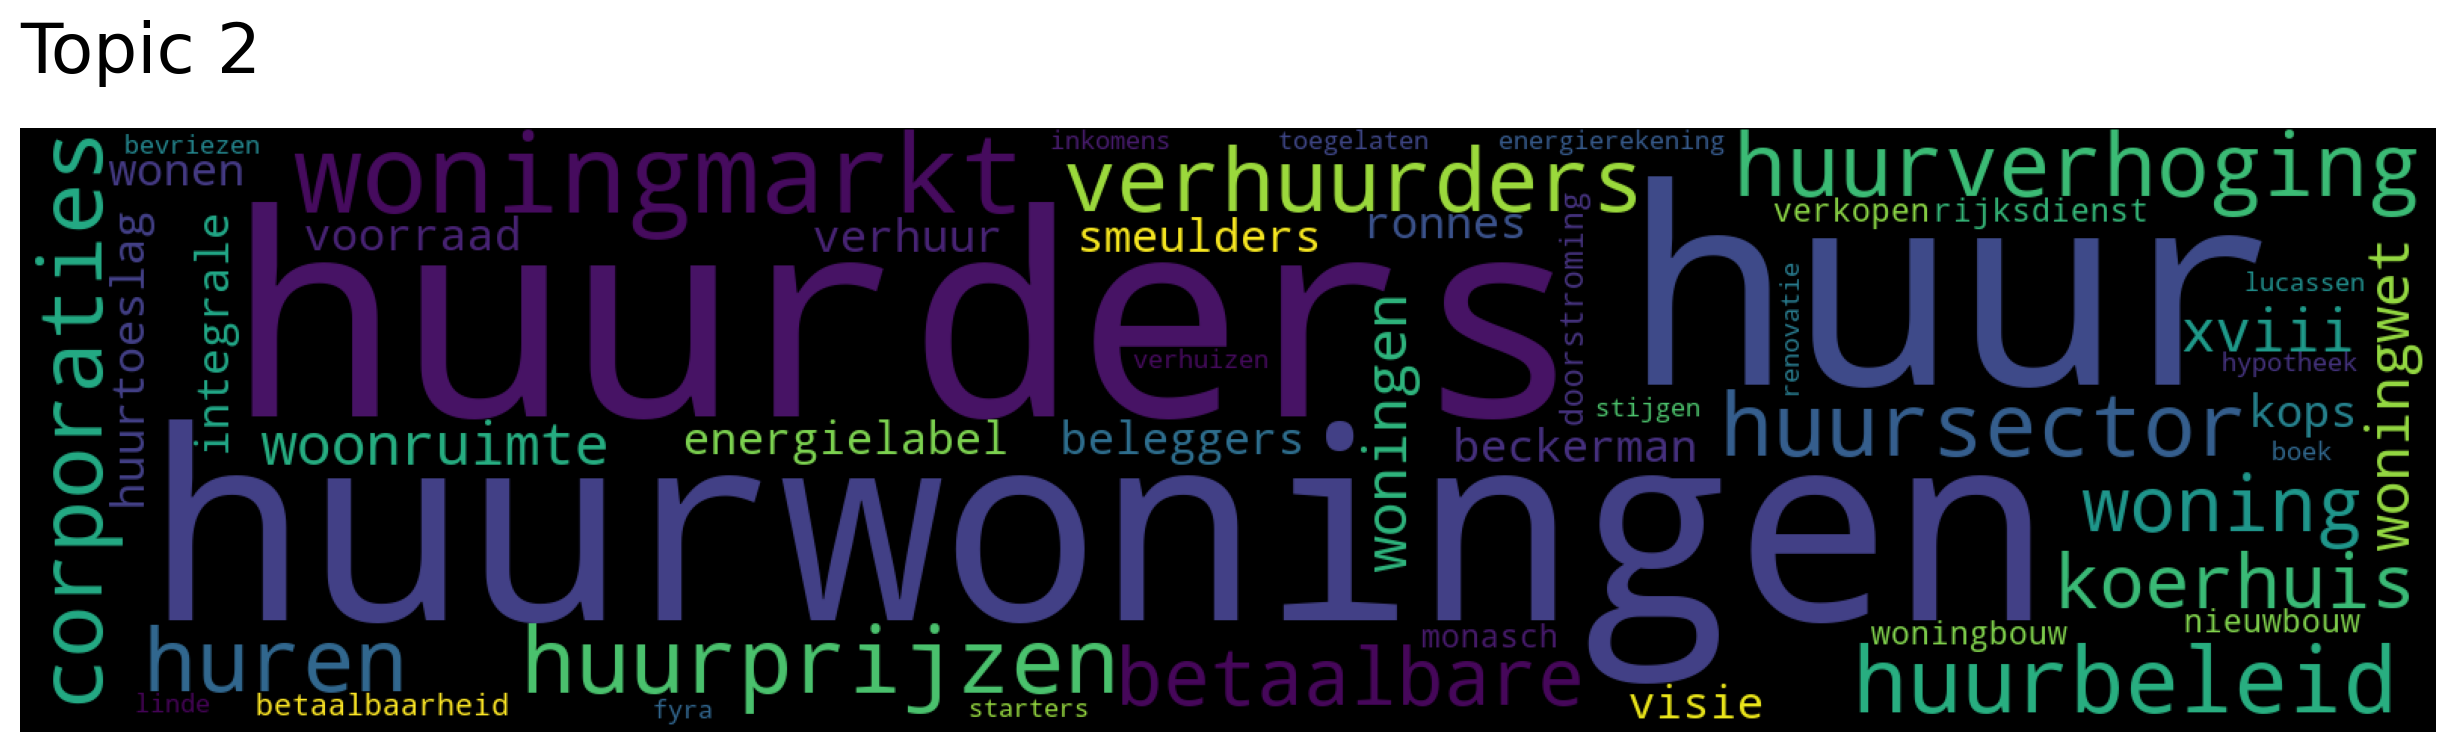

In [63]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["flexwerkers"], num_topics=1, reduced=True)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [68]:
doc_ids = list(range(len(documents)))


In [30]:
topic_nums, topic_score, topic_words, word_scores = model.get_documents_topics(doc_ids,reduced=True)

array([123, 140,  44, 112,  45], dtype=int64)

In [85]:
topics = {
  0: 'a',  
  1: 'b',  
  2: 'c',  
  3: 'd',  
  4: 'e',  
  5: 'f',  
  6: 'g',  
  7: 'h',  
  8: 'i',  
  9: 'j',  
  10: 'k',  
  11: 'l',  
  12: 'm',  
  13: 'n',  
  14: 'o',  
  15: 'p',  
  16: 'q',  
  17: 'qq',  
  18: 'r',  
  19: 's',  
  20: 't',  
  21: 'u',  
  22: 'v',  
  23: 'w',  
  24: 'x',  
  25: 'y',  
  np.nan: 'z'
  }
topic_names = [topics[t] for t in topic_nums]
assert len(topic_nums) == len(df)
df['Topic'] = topic_names

In [70]:
save(df[:1000], 'df_including_topics.pickle')
save(df, 'df_including_topics_full.pickle')

Document: 2
Tweede Kamer der Staten-Generaal
Vergaderjaar 2018–2019 
34 534 Voorstel van wet van de leden Klaver, Asscher, 
Beckerman, Jetten, Dik-Faber, Yesilgöz-Zegerius, 
Agnes Mulder en Geleijnse houdende een kader 
voor het ontwikkelen van beleid gericht op 
onomkeerbaar en stapsgewijs terugdringen van 
de Nederlandse emissies van broeikasgassen 
teneinde wereldwijde opwarming van de aarde 
en de verandering van het klimaat te beperken 
(Klimaatwet) 
Nr. 60   MOTIE VAN HET LID VAN RAAN 
Voorgesteld 19 december 2018 
De Kamer, 
gehoord de beraadslaging, 
constaterende dat de rechter de Staat heeft opgedragen om de uitstoot 
van broeikasgassen in 2020 met minimaal 25% te verminderen ten 
opzichte van 1990; 
constaterende dat, zonder extra maatregelen, Nederland niet zal voldoen 
aan deze door de rechter bevestigde minimale doelstelling; 
constaterende dat het PBL de CO -besparing van het energieakkoord niet 
2
kon doorrekenen vanwege het ontbreken van de juiste beleidsinstru-
menten

xiii 0.6755443177463705
economische 0.6657158915549843
klimaatbeleid 0.5878414452355429
moorlag 0.5845071769754816
energie 0.5820398592464024
raan 0.5755353934298665
lee 0.5739157787176778
co 0.567619823117667
economie 0.5495002350875859
uitstoot 0.549225499972547
innovatie 0.5456982917204978
duurzame 0.543668209915285
zaken 0.5416525831118834
grote 0.5395212780267679
landbouw 0.5388213834567784
klimaatakkoord 0.5385211241871075
ministerie 0.5352854877375159
het 0.5318874895977165
natuur 0.5261804408009255
overwegende 0.5167947156588917
